In [1]:
!pip install darts

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.8/370.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 3.5 MB/s eta 0:00:00
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=9435152 sha256=6b62ca2d5d6eb0552ecb9a428ff7f01f0c4df34163b8c92e3fbd43f5e1407b17
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [2]:
from darts import TimeSeries

# Read dataset
df = pd.read_csv("../input/coviddata/MergedDataset.csv", delimiter = ',', parse_dates = True)
df = df.dropna()
df.head()

,date,retail_and_recreation_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,new_cases,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,grocery_and_pharmacy_percent_change_from_baseline
0,2020-01-29,0,0,0,0,0.0,0.0,0.4,0.0,2.78,0
1,2020-01-30,0,0,0,0,0.0,0.0,0.0,0.0,2.78,0
2,2020-01-31,0,0,0,0,0.0,0.0,0.0,0.0,2.78,0
3,2020-02-01,0,0,0,0,0.0,0.0,0.0,0.0,2.78,0
4,2020-02-02,0,0,0,0,0.0,0.0,0.1,0.0,2.78,0


from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statmodels.tsa.arima.model import ARIMA

In [3]:
from darts.models import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

def predict_arima(attr_name):
    series = TimeSeries.from_dataframe(df, 'date', attr_name)
    train, val = series[:502], series[502:]
    model = ARIMA()
    model.fit(train)
    prediction = model.predict(len(val), num_samples=1000)

    # Plot
    series.plot(label = 'actual')
    prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
    plt.legend(loc = 'upper left')
    plt.title(attr_name)

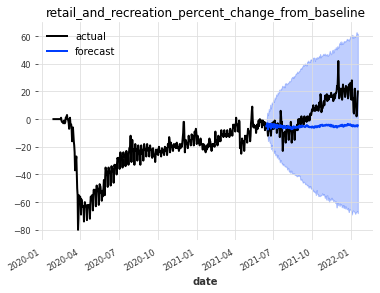

In [4]:
attr_name = 'retail_and_recreation_percent_change_from_baseline'
predict_arima(attr_name)


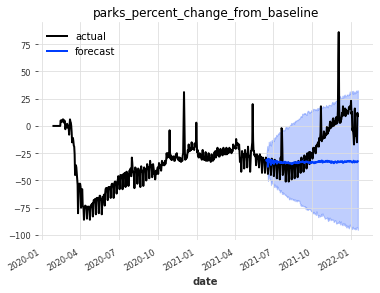

In [5]:
attr_name = 'parks_percent_change_from_baseline'
predict_arima(attr_name)

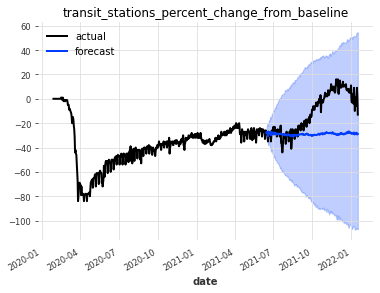

In [6]:
attr_name = 'transit_stations_percent_change_from_baseline'
predict_arima(attr_name)

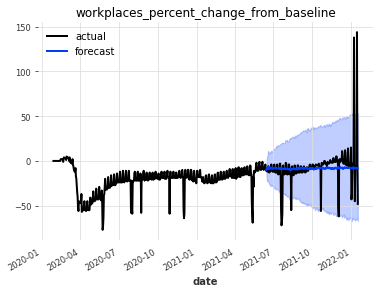

In [7]:
attr_name = 'workplaces_percent_change_from_baseline'
predict_arima(attr_name)

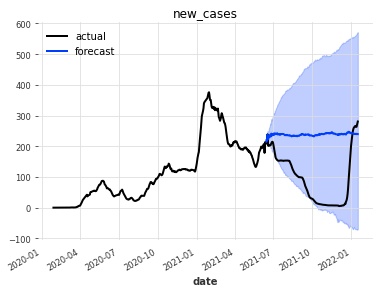

In [8]:
attr_name = 'new_cases'
predict_arima(attr_name)

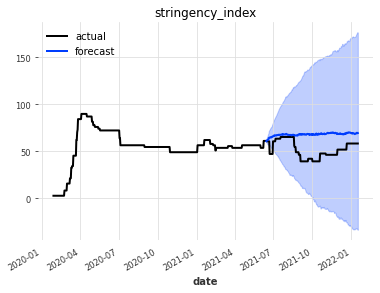

In [9]:
attr_name = 'stringency_index'
predict_arima(attr_name)